# c04-boats

*Purpose*: TODO


In [1]:
import grama as gr
import pandas as pd
import time
DF = gr.Intention()
%matplotlib inline

# Boat analysis code
import boat_utils as boat


# Context


## Basics of Boat Hull Design

### TODO Boat schematic


### Statical Stability

(TODO exposition)

Execution time: 2.572 sec


/Users/zach/opt/anaconda3/envs/uqbook/lib/python3.9/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


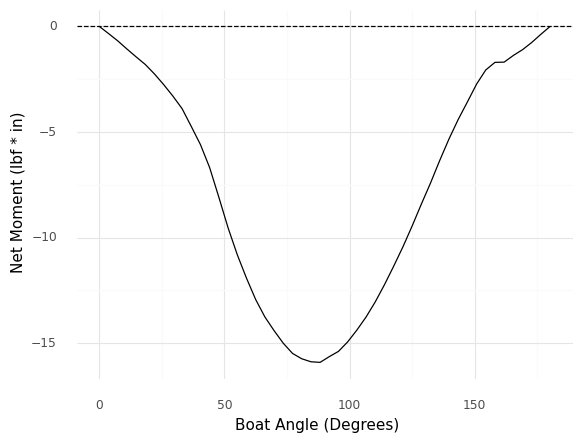

<ggplot: (8780030985442)>

In [2]:
# NOTE: No need to edit; this will analyze an example boat
t0 = time.time()
v_design = [2.5, 3.0, 2.0, 0.30, 0.35]
df_example = boat.fun_moment(v_design)
t1 = time.time()
print("Execution time: {0:4.3f} sec".format(t1 - t0))

(
    # Visualize the moment curve
    df_example
    >> gr.ggplot(gr.aes("angle * 180/3.14", "M_net"))
    + gr.geom_hline(yintercept=0, linetype="dashed")
    + gr.geom_line()
    
    + gr.scale_color_discrete(name=None)
    + gr.theme_minimal()
    + gr.labs(
        x="Boat Angle (Degrees)",
        y="Net Moment (lbf * in)",
    )
)

Some things worth noting about this example:

- The Boat Angle is the angle to which the boat hull is rotated (along its long axis).
- When the net moment is negative, a restoring torque acts to turn the boat back to upright.
- When the net moment is positive, an anti-restoring torque is applied.
<!-- - The point where the moment curve passes through the axis `M_net == 0` with positive slope is called the *angle of vanishing stability* (AVS). Rotating the boat beyond this point will cause it to settle upside-down. -->
- The boat analysis takes a non-trivial amount of time to run! Analyzing a large number of boat designs will take a fair amount of simulation time.


Note that upright stability is *not* guaranteed, even for a boat of identical geometry. The following boat has identical hull geometry but is lighter (smaller `d`) and has a higher center of mass (larger `f_com`).


Execution time: 2.996 sec


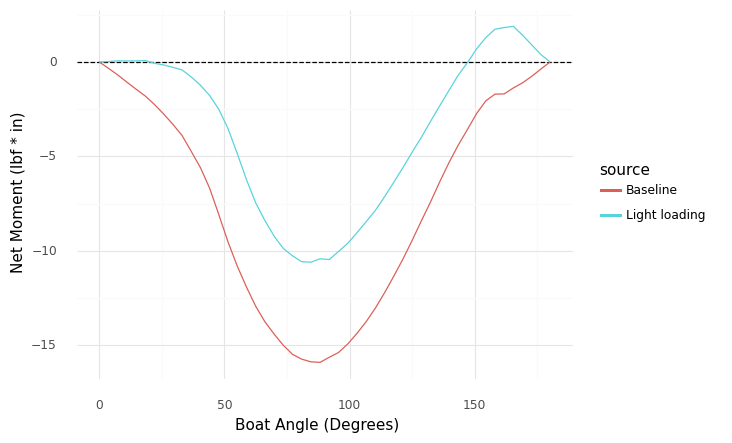

<ggplot: (8780030837113)>

In [3]:
# NOTE: No need to edit; this will analyze an example boat
t0 = time.time()
v_light = [2.5, 3.0, 2.0, 0.20, 0.40]
df_light = boat.fun_moment(v_light)
t1 = time.time()
print("Execution time: {0:4.3f} sec".format(t1 - t0))

(
    # Visualize the moment curve
    df_light
    >> gr.tf_mutate(source="Light loading")
    >> gr.tf_bind_rows(
        df_example
        >> gr.tf_mutate(source="Baseline")
    )
    >> gr.ggplot(gr.aes("angle * 180/3.14", "M_net", color="source"))
    + gr.geom_hline(yintercept=0, linetype="dashed")
    + gr.geom_line()
    
    + gr.scale_color_discrete(name=None)
    + gr.theme_minimal()
    + gr.labs(
        x="Boat Angle (Degrees)",
        y="Net Moment (lbf * in)",
    )
)

Note that the loading conditions of the boat have destabilized it at upright; the slope of the moment curve at $0^{\circ}$ is now positive.

This phenomenon is dangerous for vessels that must operate in both heavily-loaded and lightly-loaded conditions: Imagine a large transport ship that has just unloaded cargo and is in-harbor in an unloaded configuration. The destabilizing phenomenon we see here would put the crew and dockworkers in considerable danger.


## Archival Data


In [4]:
filename_archival = "./data/doe-wide.csv"
df_archival = pd.read_csv(filename_archival)
df_archival.head()

,d,n,f_com,H,W,M_max,mass,dMdtheta_avs,dMdtheta_0,M_min,BM,angle,int_M_stable,GM
0,0.414694,0.969522,0.384112,1.931260,1.390651,5.004726e-16,0.019592,NaN,-1.459991,-4.952630,0.108234,NaN,-8.019885,0.193949
1,0.242507,1.195436,0.656740,2.713299,3.580954,7.277457e+00,0.046730,NaN,9.916728,-5.402567,0.425216,NaN,3.675911,-0.557773
2,0.441223,0.936345,0.672138,1.446188,3.744617,6.550768e+00,0.040910,8.237037,-11.668754,-5.879390,1.073773,1.617128,-5.681558,0.768485
3,0.689483,0.882652,0.648739,1.210221,2.530339,1.149756e+00,0.034526,2.380926,-8.409095,-2.228434,0.764303,1.509121,-2.070254,0.652657
4,0.497305,0.780804,0.235978,2.502149,1.505777,7.886234e-16,0.029039,NaN,-8.644337,-14.019720,0.103794,NaN,-25.533024,0.796536


### Data Dictionary

| Column | I/O | Meaning |
|---|---|---|
| `d` | Input | Displacement ratio (-) |
| `n` | Input | Shape factor (-) |
| `f_com` | Input | Height of COM from boat bottom (-) |
| `H` | Input | Height of boat (in) |
| `W` | Input | Width of boat (in) |
|---|---|---|
| `M_max` | Output | Max righting moment (`lbf*in`) |
| `M_min` | Output | Min righting moment (`lbf*in`) |
| `mass` | Output | Boat mass (lb) |
| `dMdtheta_avs` | Output | Slope of moment curve at AVS (`lbf in/rad`) |
| `dMdtheta_0` | Output | Slope of moment curve at upright (`lbf*in/rad`) |
| `int_M_stable` | Output | Integral of moment curve, up to the AVS (`lbf*in*rad`) |
| `BM` | Output | Metacentric radius (in) |
| `GM` | Output | Metacentric height (in) |
| `angle` | Output | Angle of vanishing stability (rad) |


In [5]:
var = ["d", "n", "f_com", "H", "W"]
out = [
    "M_max", 
    "M_min", 
    "mass", 
    "dMdtheta_avs", 
    "dMdtheta_0", 
    "BM", 
    "GM",
    "angle",
    "int_M_stable",
]

# EDA of Archival Data


### __qX__ First look

Use simple EDA techniques to answer the questions under *observations* below.


In [6]:
# TASK: Perform simple EDA, answer the questions below
(
    df_archival
# solution-begin
    >> gr.tf_select(var)
    >> gr.tf_describe()
# solution-end
)

,d,n,f_com,H,W
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.500331,0.996067,0.558131,1.993312,2.495072
std,0.145578,0.289920,0.258698,0.575360,0.866986
min,0.193538,0.397186,0.021512,0.805669,0.743843
25%,0.371881,0.742082,0.347104,1.491662,1.735603
50%,0.493970,0.990548,0.559862,1.998756,2.497156
75%,0.624360,1.248795,0.784277,2.491131,3.269928
max,0.829827,1.623170,1.066143,3.247645,4.259180


*Observations*

<!-- task-begin -->
- How many observations (distinct boat hulls) are there in-total?
  - (Your response here)
- What are rough bounds for each of the input variables? (You'll use these in a later task....)
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- How many observations (distinct boat hulls) are there in-total?
  - There are `1000` observations.
- What are rough bounds for each of the input variables?

| Var | Bounds |
|---|---|
| `d` | `[0.19, 0.83]` |
| `n` | `[0.39, 1.63]` |
| `f_com` | `[0.02, 1.07]` |
| `H` | `[0.74, 4.26]` |
| `W` | `[0.74, 4.26]` |

<!-- solution-end -->


### __qX__ How many designs are upright-stable?

Remember that "upright-stable" means the slope of the moment curve at an upright position is negative.


In [7]:
(
    df_archival
# solution-begin
    >> gr.tf_count(DF.dMdtheta_0 < 0)
    >> gr.tf_mutate(
        f=DF.n / gr.colsum(DF.n)
    )
# solution-end
)

,dMdtheta_0,n,f
0,False,330,0.33
1,True,670,0.67


*Observations*

<!-- task-begin -->
- How many boat designs in the dataset are upright-stable?
  - (Your response here)
- How *fraction* of boat designs in the dataset are upright-stable?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- How many boat designs in the dataset are upright-stable?
  - There are `670` upright-stable boats.
- How *fraction* of boat designs in the dataset are upright-stable?
  - This is `67%` percent of the dataset.
<!-- solution-end -->


### __qX__ Correlation tile plot


Calling plot_corrtile....


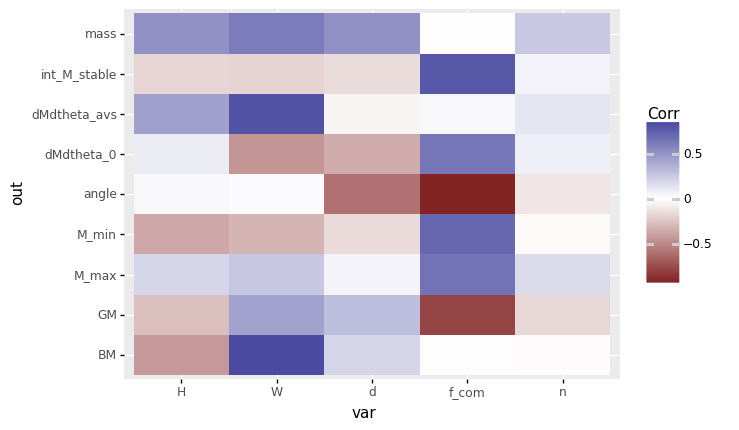

<ggplot: (8780030617435)>

In [8]:
(
    df_archival
# task-begin
    ## Compute the input/output correlation data here
# task-end
# solution-begin
    >> gr.tf_iocorr(var=var, out=out, nan_drop=True)
# solution-end
    ## NOTE: No need to edit; this will visualize your data
    >> gr.pt_auto()
)

*Observations*

<!-- task-begin -->
- Which inputs correlate strongly with the slope of the moment curve at upright (`dMdtheta_0`)?
  - (Your response here)
- For each of the inputs you identified above, what is the sign of the correlation? (Positive or negative?) For each input, what kind of change (increase or decrease) is required to increase upright stability?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- Which inputs correlate strongly with the slope of the moment curve at upright (`dMdtheta_0`)?
  - The inputs `W, d, f_com` correlate strongly with `dMdtheta_0`.
- For each of the inputs you identified above, what is the sign of the correlation? (Positive or negative?) For each input, what kind of change (increase or decrease) is required to increase upright stability?
  - `W` correlates negatively with `dMdtheta_0`; increasing `W` increases stability.
  - `d` correlates negatively with `dMdtheta_0`; increasing `d` increases stability.
  - `f_com` correlates negatively with `dMdtheta_0`; decreasing `f_com` increases stability.
<!-- solution-end -->


### __qX__ Detailed scatterplots

Make scatterplots to study relationship between `dMdtheta_0` and the relevant inputs you identified above. Add a smooth trend to each scatterplot with `gr.geom_smooth()`.

*Hint*: While it is possible to construct all three plots in a single code cell, you should feel free to create additional cells as-necessary.


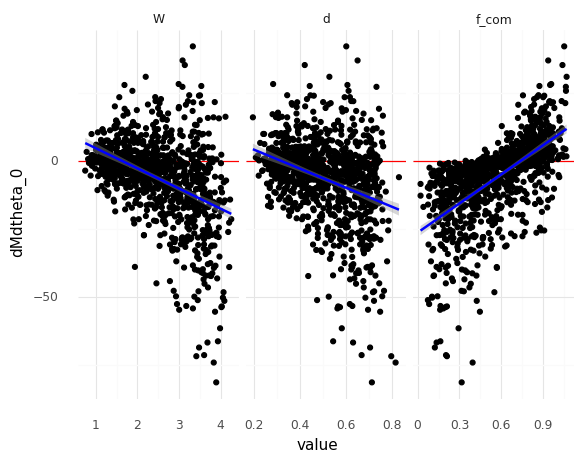

<ggplot: (8780033039165)>

In [18]:
# TODO: Create scatterplots
# solution-begin
(
    df_archival
    >> gr.tf_select(
        "dMdtheta_0",
        "W",
        "d",
        "f_com"
    )
    >> gr.tf_pivot_longer(
        columns=["W", "d", "f_com"],
        names_to="var",
        values_to="value",
    )
    
    >> gr.ggplot(gr.aes("value", "dMdtheta_0"))
    + gr.geom_hline(yintercept=0, color="red")
    + gr.geom_point()
    + gr.geom_smooth(color="blue")
    + gr.facet_grid("~var", scales="free_x")
    + gr.theme_minimal()
)
# solution-end

*Observations*

<!-- task-begin -->
- Is the observed variability real or erroneous?
  - (Your response here)
- Describe the effects of each input on the output `dMdtheta_0`.
  - (Your response here)
- For each input, describe the variability around the `gr.geom_smooth()` trend: Is it small or large at different values of the input?) 
  - (Your response here)
- Do any of the inputs have a more *predictable* effect on `dMdtheta_0`?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- Is the observed variability real or erroneous?
  - Real
- Describe the effects of each input on the output `dMdtheta_0`.
  - `W` and `d` have a negative effect, while `f_com` has a positive effect.
- For each input, describe the variability around the `gr.geom_smooth()` trend: Is it small or large at different values of the input?) 
  - `W`: The variability is small at lo
- Do any of the inputs have a more *predictable* effect on `dMdtheta_0`?
  - (Your response here)
<!-- solution-end -->


# Model Setup

```python
df_res = boat.fun_performance(v)
```


### __qX__ Time the analysis


In [9]:
n_rep = 5

t0 = time.time()
for i in range(n_rep):
# solution-begin
    df_res = boat.fun_performance(v_design)
# solution-end
t1 = time.time()

t_exec = (t1 - t0) / n_rep

print("Average execution time: {0:} sec".format(t_exec))


Average execution time: 1.9880004405975342 sec


### __qX__ Define the input order


In [10]:
out_performance = [
    "mass",
    "GM",
    "angle",
    "dMdtheta_0",
    "dMdtheta_avs",
    "M_max",
    "M_min",
    "int_M_stable",
]

# solution-begin
var_performance = ["H", "W", "n", "d", "f_com"]
# solution-end

## NOTE: No need to edit; use this to check your work
assert \
    set(var_performance) == set(boat.var_correct), \
    "Inputs not correct"
assert \
    var_performance == boat.var_correct, \
    "Inputs are not in the correct order; check " + \
    "the documentation for boat.fun_performance()."

```{admonition} Why does order matter?
By default, Python functions interpret their inputs based on **order**. Grama takes care of variables based on **name**, but when working with a "regular" Python function, we have to be careful to give grama the correct order information. Imagine giving the value for boat height `H` as the shape factor `n`, or vice versa! If we are careful when defining a grama model, we can prevent these order issues later.
```

### __qX__ Assemble the model


In [11]:
md_performance = (
    gr.Model("Boat performance")
    >> gr.cp_function(
        fun=boat.fun_performance,
# task-begin
        # Add input and output names;
        # runtime estimate
# task-end
# solution-begin
        var=var_performance,
        out=out_performance,
        name="Performance metrics",
        runtime=t_exec,
# solution-end
    )
    >> gr.cp_bounds(
# task-begin
        # Add input bounds
# task-end
# solution-begin
        d=[0.19, 0.83],
        n=[0.39, 1.63],
        f_com=[0.02, 1.07],
        H=[0.74, 4.26],
        W=[0.74, 4.26],
# solution-end
    )
)

## NOTE: No need to edit; use this to check your work
assert \
    md_performance.functions[0].runtime > 0, \
    "Model has no runtime estimate"
for v in var_performance:
    assert \
        md_performance.domain.bounds[v][0] < df_archival[v].min(), \
        "Archival data for {} exceeds model lower bound".format(v)
    assert \
        df_archival[v].max() < md_performance.domain.bounds[v][1], \
        "Archival data for {} exceeds model upper bound".format(v)

md_performance

model: Boat performance

  inputs:
    var_det:
      H: [0.74, 4.26]
      f_com: [0.02, 1.07]
      W: [0.74, 4.26]
      n: [0.39, 1.63]
      d: [0.19, 0.83]

    var_rand:

    copula:
      None

  functions:
      Performance metrics: ['H', 'W', 'n', 'd', 'f_com'] -> ['mass', 'GM', 'angle', 'dMdtheta_0', 'dMdtheta_avs', 'M_max', 'M_min', 'int_M_stable']